In [5]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

In [6]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228813984/228813984 [==============================] - 136s 1us/step


In [7]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [31]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

batch_size = 100
IMG_SHAPE = 150

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

train_generator = train_datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(IMG_SHAPE, IMG_SHAPE)
)

val_datagen = ImageDataGenerator(rescale=1. / 255.)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(IMG_SHAPE, IMG_SHAPE)
)


Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [29]:
total_train = train_generator.n
print("Number of training images:", total_train)

total_val = val_generator.n
print("Number of validation images:", total_val)


Number of training images: 2935
Number of validation images: 735


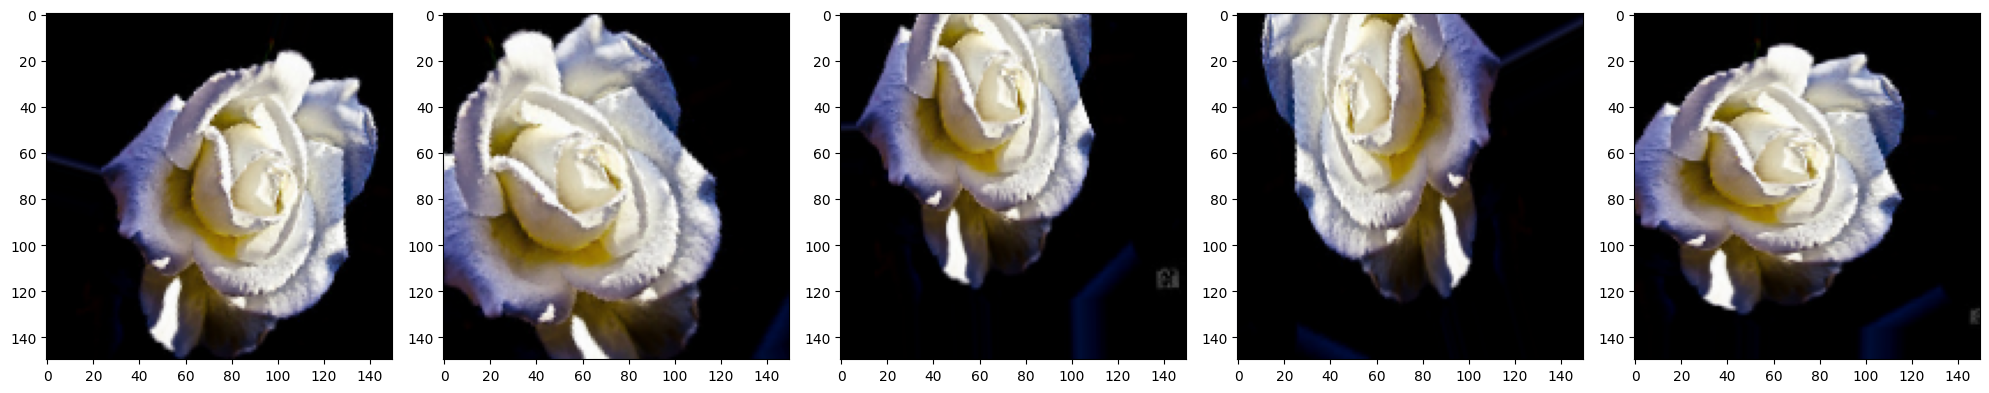

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy']
              )

In [35]:
EPOCHS = 50
history = model.fit(train_generator,
          epochs=EPOCHS,
          steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
          validation_data=val_generator,
          validation_steps=int(np.ceil(total_val / float(batch_size)))
          )

Epoch 1/50


2023-08-12 11:21:30.005684: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27000000 exceeds 10% of free system memory.
2023-08-12 11:21:30.049517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-08-12 11:21:31.109356: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0xd6b9d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-12 11:21:31.109399: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-08-12 11:21:31.147831: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-12

30/30 [==============================] - ETA: 0s - loss: 1.7227 - accuracy: 0.3438

2023-08-12 11:21:50.821780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


30/30 [==============================] - 22s 583ms/step - loss: 1.7227 - accuracy: 0.3438 - val_loss: 1.2078 - val_accuracy: 0.4599
Epoch 2/50
30/30 [==============================] - 17s 546ms/step - loss: 1.2311 - accuracy: 0.4876 - val_loss: 1.1343 - val_accuracy: 0.4925
Epoch 3/50
30/30 [==============================] - 17s 570ms/step - loss: 1.1712 - accuracy: 0.5390 - val_loss: 1.0863 - val_accuracy: 0.5497
Epoch 4/50
30/30 [==============================] - 17s 594ms/step - loss: 1.1018 - accuracy: 0.5574 - val_loss: 1.0331 - val_accuracy: 0.5769
Epoch 5/50
30/30 [==============================] - 17s 563ms/step - loss: 1.0546 - accuracy: 0.5888 - val_loss: 1.1712 - val_accuracy: 0.5333
Epoch 6/50
30/30 [==============================] - 18s 591ms/step - loss: 1.0104 - accuracy: 0.6106 - val_loss: 0.9204 - val_accuracy: 0.6517
Epoch 7/50
30/30 [==============================] - 23s 755ms/step - loss: 0.9841 - accuracy: 0.6150 - val_loss: 0.9792 - val_accuracy: 0.6150
Epoch 8/50

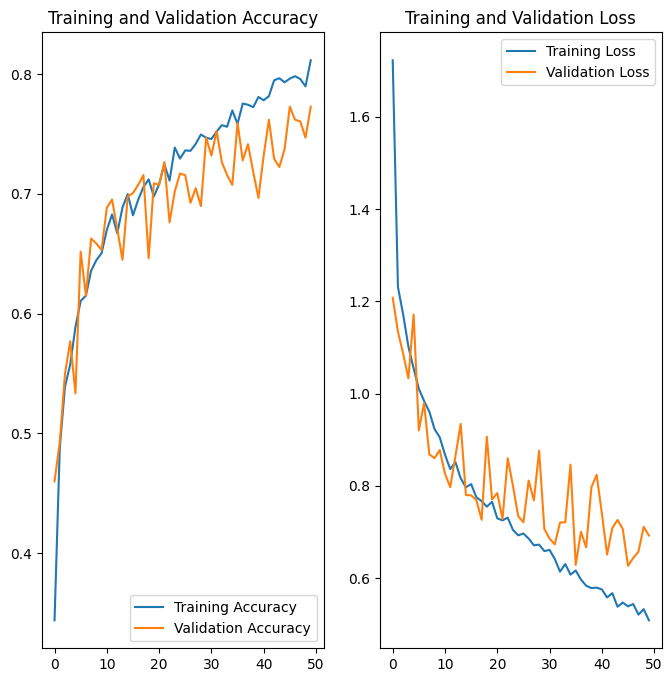

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./flowers-result.png')
plt.show()